# Exploratory Data Analysis (EDA) for Cab Industry Dataset

## Objective
The objective of this notebook is to perform exploratory data analysis on the cab industry dataset. This analysis aims to uncover patterns, trends, and insights from the data, helping in understanding customer behavior, company performance, and other key metrics.

## Data Description
We have four datasets:
1. **Cab Data**: Contains information about cab trips, including trip details and costs.
2. **Customer Data**: Contains demographic information about customers.
3. **Transaction Data**: Contains payment information for transactions.
4. **City Data**: Contains population and user statistics for different cities.

In [33]:
import pandas as pd

# Load datasets
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

# Display first few rows of each dataset
cab_data.head(), customer_data.head(), transaction_data.head(), city_data.head()

(   Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               10813
 1        27703   Male   27                9237
 2        28712   Male   53               11242
 3        28020   Male   23               23327
 4        27182   Male   33                8536,
    Transaction ID  Customer ID Payment_Mode
 0        10000

## Data Cleaning
Let's check for missing values and duplicates in each dataset and perform necessary data type conversions.

In [34]:
# Check for missing values
print("Missing Values in Cab Data:\n", cab_data.isnull().sum())
print("Missing Values in Customer Data:\n", customer_data.isnull().sum())
print("Missing Values in Transaction Data:\n", transaction_data.isnull().sum())
print("Missing Values in City Data:\n", city_data.isnull().sum())

# Check for duplicates
print("Duplicates in Cab Data:", cab_data.duplicated().sum())
print("Duplicates in Customer Data:", customer_data.duplicated().sum())
print("Duplicates in Transaction Data:", transaction_data.duplicated().sum())
print("Duplicates in City Data:", city_data.duplicated().sum())

# Data type correction for city_data
city_data['Population'] = city_data['Population'].replace(r'[\$,]', '', regex=True).astype(int)
city_data['Users'] = city_data['Users'].replace(r'[\$,]', '', regex=True).astype(int)

# Confirm changes
city_data.dtypes

Missing Values in Cab Data:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Missing Values in Customer Data:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Missing Values in Transaction Data:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
Missing Values in City Data:
 City          0
Population    0
Users         0
dtype: int64
Duplicates in Cab Data: 0
Duplicates in Customer Data: 0
Duplicates in Transaction Data: 0
Duplicates in City Data: 0


City          object
Population     int64
Users          int64
dtype: object

## Exploratory Data Analysis (EDA)
We will perform EDA to understand the data better. This includes statistical summaries, visualizations, and identifying key trends and patterns.

In [35]:
# Summary statistics for each dataset
print("Summary Statistics for Cab Data:\n", cab_data.describe())
print("Summary Statistics for Customer Data:\n", customer_data.describe())
print("Summary Statistics for Transaction Data:\n", transaction_data.describe())
print("Summary Statistics for City Data:\n", city_data.describe())

Summary Statistics for Cab Data:
        Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
Summary Statistics for Customer Data:
         Customer ID           Age  Income (USD/Month)
count  49171.000000  49171

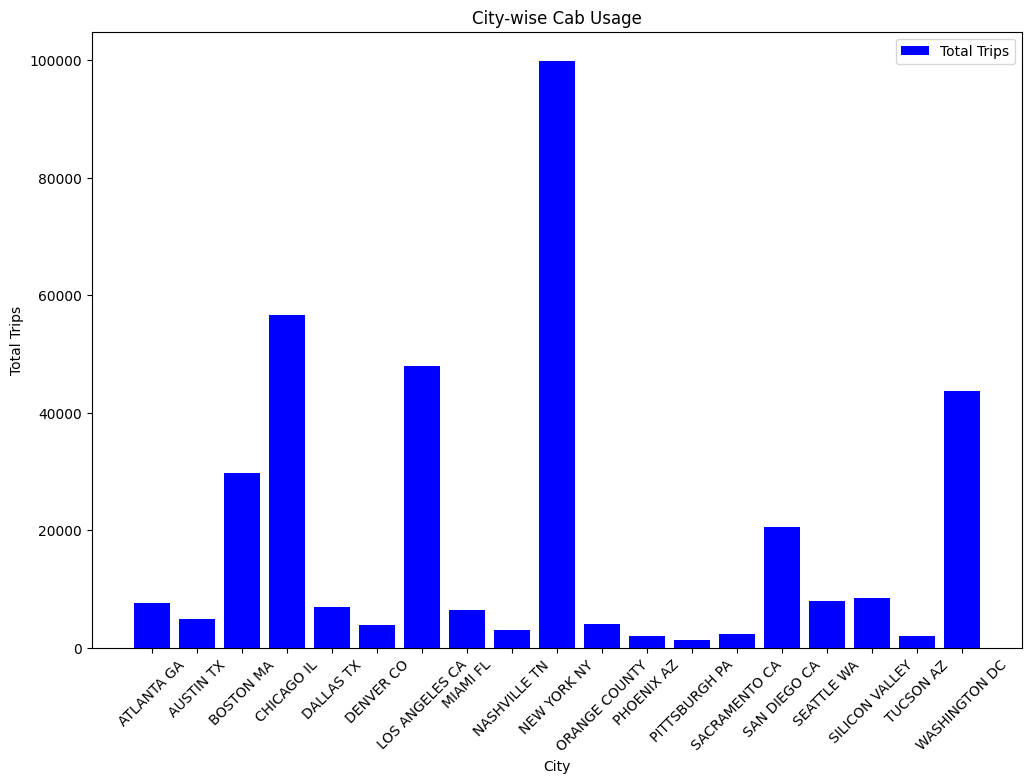

In [36]:
import matplotlib.pyplot as plt

# Group by city and aggregate metrics
city_usage = cab_data.groupby('City').agg({
    'Transaction ID': 'count',  # Total trips
    'Price Charged': 'sum',     # Total revenue
    'KM Travelled': 'mean',     # Average KM travelled
    'Cost of Trip': 'mean'      # Average cost
}).reset_index()

# Plot city-wise cab usage
plt.figure(figsize=(12, 8))
plt.bar(city_usage['City'], city_usage['Transaction ID'], color='blue', label='Total Trips')
plt.xlabel('City')
plt.ylabel('Total Trips')
plt.title('City-wise Cab Usage')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

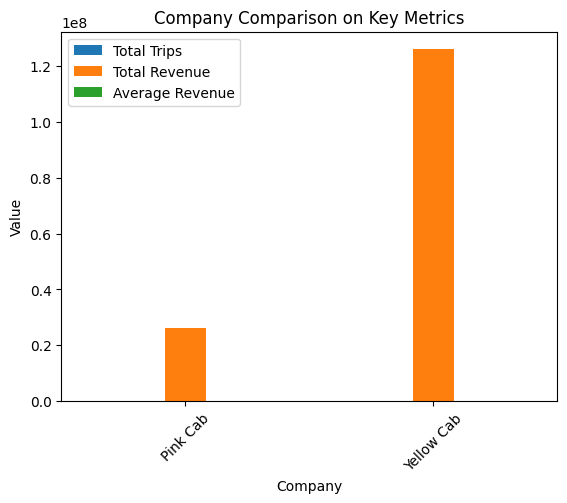

In [37]:
# Aggregate metrics by company
company_comparison = cab_data.groupby('Company').agg({
    'Transaction ID': 'count',  # Total trips
    'Price Charged': ['sum', 'mean'],  # Total and average revenue
    'KM Travelled': 'mean',  # Average KM travelled
    'Cost of Trip': 'mean'  # Average cost
}).reset_index()

company_comparison.columns = ['Company', 'Total Trips', 'Total Revenue', 'Average Revenue', 'Average KM Travelled', 'Average Cost']

# Plot comparison
plt.figure(figsize=(12, 8))
company_comparison.plot(x='Company', y=['Total Trips', 'Total Revenue', 'Average Revenue'], kind='bar')
plt.title('Company Comparison on Key Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

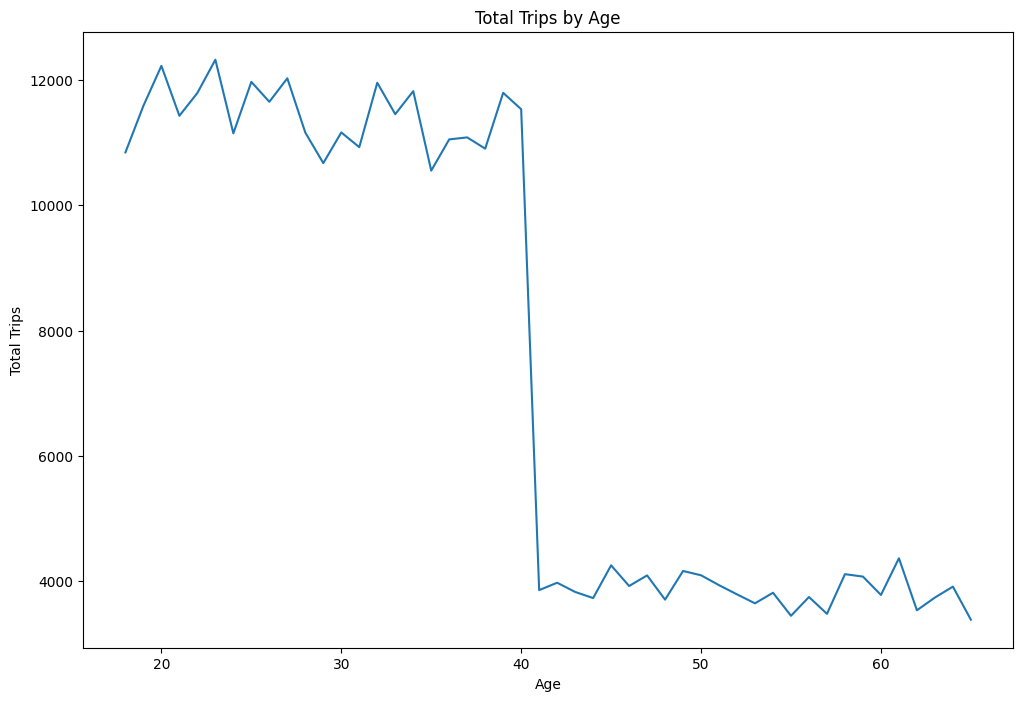

In [38]:
import seaborn as sns

# Merge customer_data with cab_data on Customer ID
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

# Aggregate total trips by age
age_analysis = merged_data.groupby('Age').agg({
    'Transaction ID': 'count'  # Total trips by age
}).reset_index()

# Plot age analysis
plt.figure(figsize=(12, 8))
sns.lineplot(data=age_analysis, x='Age', y='Transaction ID')
plt.title('Total Trips by Age')
plt.xlabel('Age')
plt.ylabel('Total Trips')
plt.show()

## Feature Engineering
Based on our initial analysis, we may create new features to enhance our dataset. Feature engineering can help in deriving new insights and improving the quality of our analysis.

In [39]:
# Example of creating a new feature
# Adding a 'Trip Duration' feature (assuming 'Date of Travel' is in days and we have an additional 'Start Date' column)
cab_data['Price per KM'] = cab_data['Price Charged'] / cab_data['KM Travelled']
# Display the new feature
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Price per KM
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,12.182266
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,12.526904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,13.849558
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,11.377751
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,13.129439


## Hypothesis Testing
We will perform hypothesis testing to validate assumptions and draw conclusions based on our dataset. Hypothesis tests will help us make data-driven decisions.

## Hypothesis 1: Average KM Travelled is the Same for All Companies

- **Null Hypothesis (H₀):** The average distance (KM Travelled) is the same across different companies.
- **Alternative Hypothesis (H₁):** The average distance (KM Travelled) differs among companies.

We will use a one-way ANOVA to test this hypothesis.

In [40]:
from scipy.stats import f_oneway

# Group KM travelled by company
company_km_travelled = [cab_data[cab_data['Company'] == company]['KM Travelled'] for company in cab_data['Company'].unique()]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*company_km_travelled)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in the average KM travelled across different companies.")
else:
    print("No significant difference in average KM travelled among the companies.")


F-Statistic: 0.0398702296345568
P-Value: 0.8417346372473642
No significant difference in average KM travelled among the companies.


## Hypothesis 2: City Population Correlates with Total Cab Usage

- **Null Hypothesis (H₀):** City population does not significantly correlate with the total number of trips.
- **Alternative Hypothesis (H₁):** City population significantly correlates with the total number of trips.

We will use Pearson correlation to test this hypothesis.


In [41]:
from scipy.stats import pearsonr

# Calculate the total number of trips for each city
city_trip_count = cab_data.groupby('City')['Transaction ID'].count().reset_index()
city_trip_count = city_trip_count.merge(city_data[['City', 'Population']], on='City')

# Perform Pearson correlation test
corr_coef, p_val = pearsonr(city_trip_count['Population'], city_trip_count['Transaction ID'])

print("Pearson Correlation Coefficient:", corr_coef)
print("P-Value:", p_val)

if p_val < 0.05:
    print("There is a significant correlation between city population and total cab usage.")
else:
    print("No significant correlation between city population and total cab usage.")

Pearson Correlation Coefficient: 0.8020855395899413
P-Value: 3.616811576521388e-05
There is a significant correlation between city population and total cab usage.


## Hypothesis 3: Average Price Charged per KM is the Same Across Cities

- **Null Hypothesis (H₀):** The average price charged per KM is the same across different cities.
- **Alternative Hypothesis (H₁):** The average price charged per KM differs among cities.

We will use a one-way ANOVA to test this hypothesis.

In [42]:
# Create a new column for price per KM
cab_data['Price per KM'] = cab_data['Price Charged'] / cab_data['KM Travelled']

# Group price per KM by city
city_price_per_km = [cab_data[cab_data['City'] == city]['Price per KM'] for city in cab_data['City'].unique()]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*city_price_per_km)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in the average price per KM across different cities.")
else:
    print("No significant difference in average price per KM among the cities.")


F-Statistic: 20284.23057278739
P-Value: 0.0
There is a significant difference in the average price per KM across different cities.


## Conclusion
In this section, we summarize the key findings from our exploratory data analysis. We also provide recommendations based on our insights and suggest potential areas for further analysis.